# Medical Image Processing and Filtering - Complete Roadmap

## 🎯 Learning Objectives
By the end of this notebook, you will understand and implement various filtering techniques used in medical image processing, from basic concepts to advanced applications.

---

## 📋 Table of Contents

### **Phase 1: Foundation & Setup**
1. **Environment Setup & Libraries**
   - Import essential libraries (OpenCV, NumPy, Matplotlib, SciPy, PIL, SimpleITK)
   - Load and display medical images (DICOM, NIfTI formats)
   - Basic image properties and metadata

### **Phase 2: Image Preprocessing Fundamentals**
2. **Image Basics & Properties**
   - Understanding medical image characteristics
   - Pixel intensities, bit depth, and dynamic range
   - Histogram analysis and interpretation

3. **Image Enhancement Techniques**
   - Contrast adjustment and histogram equalization
   - Gamma correction
   - Intensity windowing (common in medical imaging)

### **Phase 3: Core Filtering Concepts**
4. **Spatial Domain Filtering Fundamentals**
   - Convolution and correlation concepts
   - Kernel/mask design principles
   - Border handling strategies

### **Phase 4: Low-Pass Filtering**
5. **Linear Low-Pass Filters**
   - **Box Filter (Mean Filter)**
     - Implementation and applications
     - Noise reduction in X-ray images
   
6. **Gaussian Low-Pass Filter**
   - **Gaussian Kernel Theory**
   - **Multi-scale Gaussian filtering**
   - **Applications in MRI preprocessing**
   - **Gaussian pyramid construction**

7. **Advanced Low-Pass Filters**
   - **Median Filter** (Non-linear)
     - Salt-and-pepper noise removal
     - Preserving edges while smoothing
   - **Bilateral Filter**
     - Edge-preserving smoothing
     - Applications in CT scan enhancement

### **Phase 5: High-Pass Filtering**
8. **Edge Detection and High-Pass Filters**
   - **Basic High-Pass Kernels**
     - Laplacian operator
     - Sobel operators (Gx, Gy)
     - Prewitt operators
   
9. **Advanced Edge Detection**
   - **Canny Edge Detector**
     - Multi-stage edge detection
     - Applications in organ boundary detection
   - **Laplacian of Gaussian (LoG)**
     - Zero-crossing detection
     - Blob detection in medical images

### **Phase 6: Band-Pass Filtering**
10. **Frequency Domain Filtering**
    - **Fourier Transform in Medical Imaging**
      - FFT implementation for images
      - Frequency spectrum analysis
    
11. **Band-Pass Filter Design**
    - **Ideal Band-Pass Filters**
    - **Butterworth Band-Pass Filters**
    - **Gaussian Band-Pass Filters**
    - **Applications in removing specific noise frequencies**

### **Phase 7: Specialized Medical Image Filters**
12. **Anisotropic Diffusion Filtering**
    - **Perona-Malik Filter**
      - Edge-preserving smoothing
      - Applications in MRI and CT enhancement
    
13. **Morphological Filtering**
    - **Opening and Closing operations**
    - **Top-hat and Bottom-hat filters**
    - **Applications in X-ray image enhancement**

14. **Wiener Filtering**
    - **Noise modeling and estimation**
    - **Restoration of blurred medical images**
    - **Applications in ultrasound imaging**

15. **Non-Local Means Filtering**
    - **Advanced denoising technique**
    - **Texture preservation in medical images**
    - **Applications in low-dose CT reconstruction**

### **Phase 8: Advanced Filtering Techniques**
16. **Wavelet-Based Filtering**
    - **Discrete Wavelet Transform (DWT)**
    - **Wavelet denoising**
    - **Multi-resolution analysis**
    - **Applications in mammography enhancement**

17. **Adaptive Filtering**
    - **Local adaptive filters**
    - **Region-based filtering**
    - **Content-aware filtering for different tissue types**

### **Phase 9: Medical Image Specific Applications**
18. **Modality-Specific Filtering**
    - **X-ray Image Enhancement**
      - Histogram equalization variants
      - Unsharp masking
    - **CT Scan Processing**
      - Window/level adjustments
      - Metal artifact reduction
    - **MRI Image Processing**
      - Bias field correction
      - Noise reduction techniques
    - **Ultrasound Image Enhancement**
      - Speckle noise reduction
      - Contrast improvement

19. **Region of Interest (ROI) Based Filtering**
    - **Selective filtering techniques**
    - **Organ-specific enhancement**
    - **Pathology detection support**

### **Phase 10: Quality Assessment & Validation**
20. **Filter Performance Evaluation**
    - **Quantitative metrics** (PSNR, SSIM, MSE)
    - **Visual quality assessment**
    - **Clinical relevance evaluation**

21. **Comparative Analysis**
    - **Filter comparison on same datasets**
    - **Computational efficiency analysis**
    - **Clinical workflow integration**

### **Phase 11: Practical Implementation**
22. **Real Medical Dataset Processing**
    - **DICOM image handling**
    - **Batch processing techniques**
    - **Pipeline creation for clinical workflows**

23. **Filter Combination Strategies**
    - **Sequential filtering approaches**
    - **Hybrid filtering techniques**
    - **Optimization for specific diagnostic tasks**

---

## 🔧 Tools and Libraries We'll Use

- **OpenCV**: Primary image processing library
- **NumPy**: Numerical computations and array operations
- **SciPy**: Advanced signal processing functions
- **Matplotlib**: Visualization and plotting
- **PIL/Pillow**: Image I/O operations
- **SimpleITK**: Medical image analysis toolkit
- **Pydicom**: DICOM file handling
- **Scikit-image**: Additional image processing algorithms

---

## 📊 Expected Outcomes

After completing this roadmap, you will be able to:

1. ✅ **Apply appropriate filters** for different types of medical images
2. ✅ **Design custom filtering solutions** for specific medical imaging challenges
3. ✅ **Evaluate filter performance** using quantitative and qualitative metrics
4. ✅ **Integrate filtering techniques** into medical image analysis pipelines
5. ✅ **Understand the trade-offs** between different filtering approaches
6. ✅ **Implement real-time filtering** for clinical applications

---

## 🚀 Let's Begin!

We'll start with setting up our environment and loading our first medical images, then progressively work through each filtering technique with practical examples and real medical image datasets.

Each section will include:
- **Theory explanation**
- **Code implementation**
- **Visual comparisons**
- **Clinical applications**
- **Performance analysis**

---

## Phase 1: Environment Setup & Libraries

Let's start by setting up our environment with all the necessary libraries for medical image processing and filtering.

In [3]:
# Essential Libraries for Medical Image Processing and Filtering
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage, signal
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, filters, restoration, morphology, measure
from skimage.filters import gaussian, median  # Note: bilateral is not in skimage.filters
from skimage.feature import canny
from skimage.restoration import denoise_nl_means, estimate_sigma
import warnings
warnings.filterwarnings('ignore')

# For medical image formats (optional - install if needed)
try:
    import pydicom
    print("✅ pydicom available for DICOM files")
except ImportError:
    print("⚠️ pydicom not available - install with: pip install pydicom")

try:
    import SimpleITK as sitk
    print("✅ SimpleITK available for advanced medical image processing")
except ImportError:
    print("⚠️ SimpleITK not available - install with: pip install SimpleITK")

# Set up matplotlib for better visualization
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

print("🚀 Environment setup complete!")
print("📦 Available libraries:")
print("   - OpenCV for computer vision")
print("   - NumPy for numerical operations") 
print("   - SciPy for signal processing")
print("   - Scikit-image for image processing")
print("   - Matplotlib for visualization")
print("\n📝 Note: Bilateral filter will be implemented using OpenCV (cv2.bilateralFilter)")

✅ pydicom available for DICOM files
✅ SimpleITK available for advanced medical image processing
🚀 Environment setup complete!
📦 Available libraries:
   - OpenCV for computer vision
   - NumPy for numerical operations
   - SciPy for signal processing
   - Scikit-image for image processing
   - Matplotlib for visualization

📝 Note: Bilateral filter will be implemented using OpenCV (cv2.bilateralFilter)


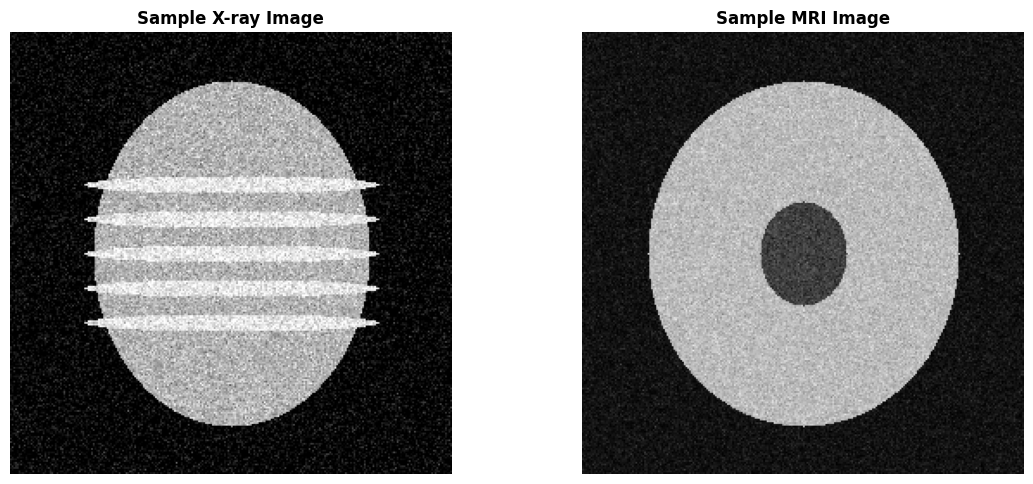

✅ Sample medical images created successfully!
📊 Image properties:
   X-ray: (256, 256), Range: [0.000, 1.000]
   MRI: (256, 256), Range: [0.000, 0.824]


In [4]:
# Utility Functions for Medical Image Processing
def create_sample_medical_images():
    """Create sample medical-like images for demonstration"""
    
    # Create a synthetic X-ray like image
    x_ray = np.zeros((256, 256))
    # Add some anatomical structures
    center = (128, 128)
    y, x = np.ogrid[:256, :256]
    
    # Chest cavity (ellipse)
    chest = ((x - center[0])**2 / 80**2 + (y - center[1])**2 / 100**2) <= 1
    x_ray[chest] = 0.7
    
    # Ribs (multiple arcs)
    for i in range(5):
        rib_center = center[1] - 40 + i * 20
        rib = ((x - center[0])**2 / 85**2 + (y - rib_center)**2 / 5**2) <= 1
        x_ray[rib] = 0.9
    
    # Add noise
    noise = np.random.normal(0, 0.1, (256, 256))
    x_ray = np.clip(x_ray + noise, 0, 1)
    
    # Create a synthetic MRI-like image
    mri = np.zeros((256, 256))
    # Brain outline
    brain = ((x - center[0])**2 / 90**2 + (y - center[1])**2 / 100**2) <= 1
    mri[brain] = 0.6
    
    # Brain structures
    ventricle = ((x - center[0])**2 / 25**2 + (y - center[1])**2 / 30**2) <= 1
    mri[ventricle] = 0.2
    
    # Add Rician noise (common in MRI)
    noise_real = np.random.normal(0, 0.05, (256, 256))
    noise_imag = np.random.normal(0, 0.05, (256, 256))
    mri = np.abs(mri + noise_real + 1j * noise_imag)
    
    return x_ray, mri

def add_various_noise(image, noise_type='gaussian', **kwargs):
    """Add different types of noise to simulate real medical imaging conditions"""
    
    if noise_type == 'gaussian':
        noise = np.random.normal(0, kwargs.get('sigma', 0.1), image.shape)
        return np.clip(image + noise, 0, 1)
    
    elif noise_type == 'salt_pepper':
        noisy = image.copy()
        prob = kwargs.get('prob', 0.05)
        
        # Salt noise
        salt = np.random.random(image.shape) < prob/2
        noisy[salt] = 1
        
        # Pepper noise
        pepper = np.random.random(image.shape) < prob/2
        noisy[pepper] = 0
        
        return noisy
    
    elif noise_type == 'speckle':
        noise = np.random.normal(0, kwargs.get('sigma', 0.1), image.shape)
        return image + image * noise
    
    return image

def display_images(images, titles, figsize=(15, 5), cmap='gray'):
    """Display multiple images in a row"""
    n_images = len(images)
    fig, axes = plt.subplots(1, n_images, figsize=figsize)
    
    if n_images == 1:
        axes = [axes]
    
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(title, fontsize=12, fontweight='bold')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def calculate_image_metrics(original, filtered):
    """Calculate common image quality metrics"""
    # Mean Squared Error
    mse = np.mean((original - filtered) ** 2)
    
    # Peak Signal-to-Noise Ratio
    if mse == 0:
        psnr = float('inf')
    else:
        psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    
    # Structural Similarity Index
    from skimage.metrics import structural_similarity as ssim
    ssim_value = ssim(original, filtered, data_range=1.0)
    
    return {'MSE': mse, 'PSNR': psnr, 'SSIM': ssim_value}

# Create our sample medical images
x_ray_sample, mri_sample = create_sample_medical_images()

# Display the sample images
display_images([x_ray_sample, mri_sample], 
               ['Sample X-ray Image', 'Sample MRI Image'],
               figsize=(12, 5))

print("✅ Sample medical images created successfully!")
print("📊 Image properties:")
print(f"   X-ray: {x_ray_sample.shape}, Range: [{x_ray_sample.min():.3f}, {x_ray_sample.max():.3f}]")
print(f"   MRI: {mri_sample.shape}, Range: [{mri_sample.min():.3f}, {mri_sample.max():.3f}]")

---

## Phase 4: Low-Pass Filtering - Noise Reduction & Smoothing

Low-pass filters are fundamental in medical image processing for:
- **Noise reduction** in X-ray, CT, and MRI images
- **Preprocessing** before edge detection or segmentation
- **Multi-scale analysis** and image pyramids
- **Artifact removal** in various imaging modalities

Let's explore different types of low-pass filters with practical examples.

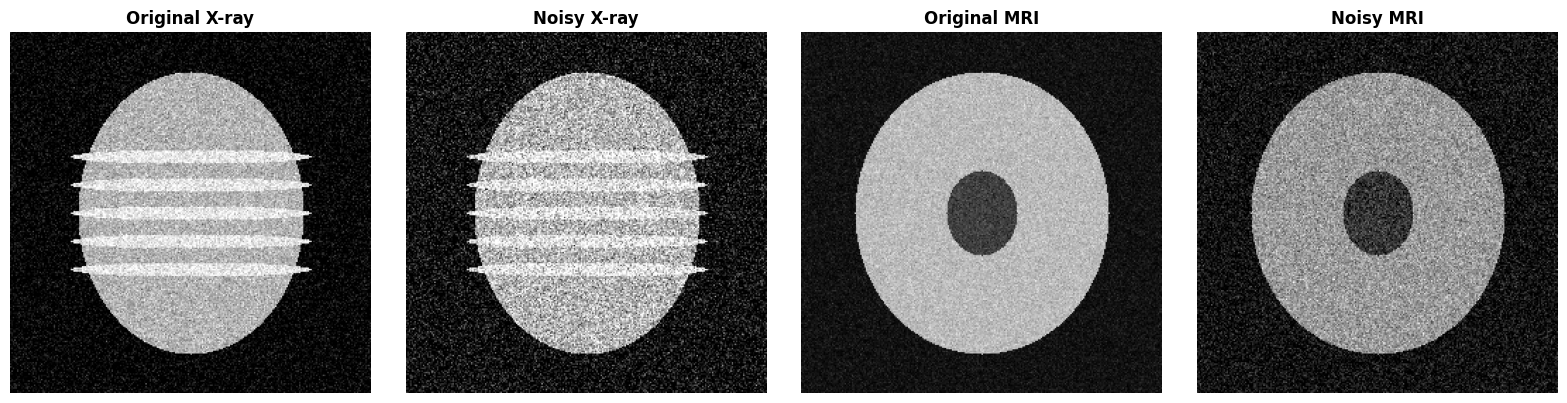

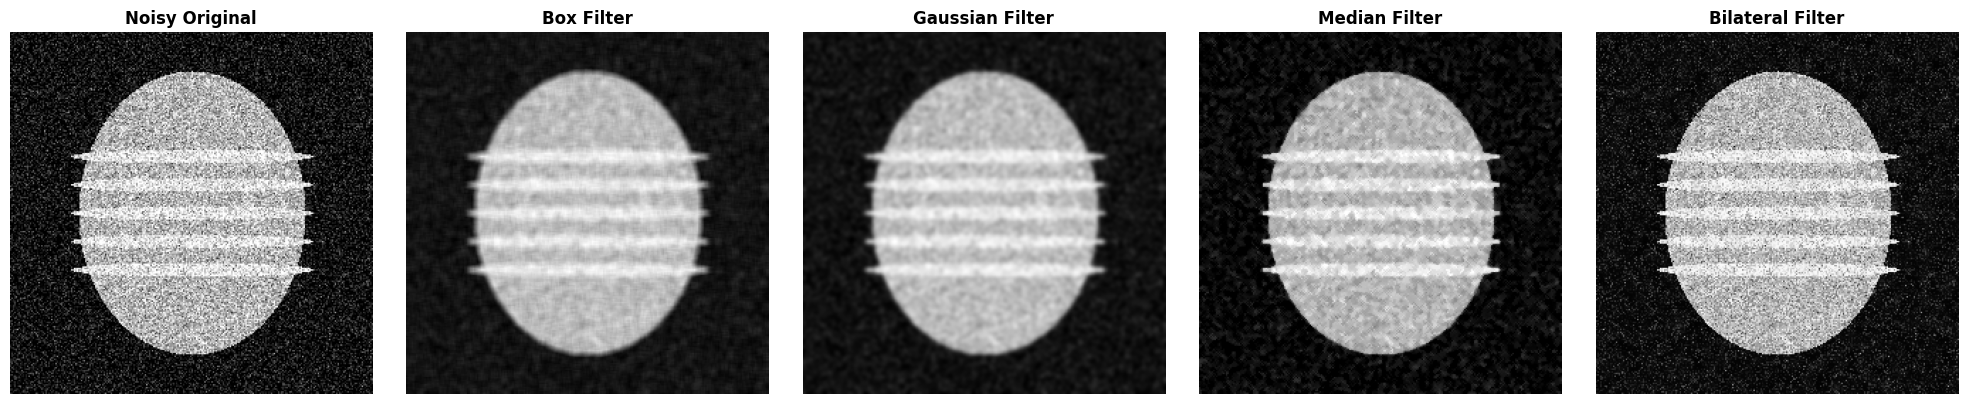

📊 Filter Performance Metrics (X-ray Image):
------------------------------------------------------------
Box Filter      | PSNR:  19.97 dB | SSIM: 0.2312 | MSE: 0.010059
Gaussian Filter | PSNR:  20.26 dB | SSIM: 0.2640 | MSE: 0.009420
Median Filter   | PSNR:  20.80 dB | SSIM: 0.2791 | MSE: 0.008321
Bilateral Filter | PSNR:  20.24 dB | SSIM: 0.4715 | MSE: 0.009463

✅ Low-pass filters applied successfully!
🔍 Observations:
   - Box filter: Simple but can cause blurring
   - Gaussian filter: Smooth results, good for most applications
   - Median filter: Excellent for impulse noise, preserves edges
   - Bilateral filter: Best edge preservation while smoothing


In [5]:
### 1. Linear Low-Pass Filters Implementation

# Add noise to our sample images for filtering demonstration
noisy_xray = add_various_noise(x_ray_sample, 'gaussian', sigma=0.15)
noisy_mri = add_various_noise(mri_sample, 'gaussian', sigma=0.1)

# Display original vs noisy images
display_images([x_ray_sample, noisy_xray, mri_sample, noisy_mri],
               ['Original X-ray', 'Noisy X-ray', 'Original MRI', 'Noisy MRI'],
               figsize=(16, 4))

# 1. BOX FILTER (Mean Filter)
def apply_box_filter(image, kernel_size=5):
    """Apply box/mean filter for basic noise reduction"""
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)

# 2. GAUSSIAN FILTER
def apply_gaussian_filter(image, sigma=1.0):
    """Apply Gaussian filter - most common in medical imaging"""
    return gaussian(image, sigma=sigma, truncate=3.0, preserve_range=True)

# 3. MEDIAN FILTER (Non-linear but commonly used)
def apply_median_filter(image, kernel_size=5):
    """Apply median filter - excellent for salt-and-pepper noise"""
    return median(image, morphology.disk(kernel_size//2))

# 4. BILATERAL FILTER (Edge-preserving)
def apply_bilateral_filter(image, sigma_spatial=15, sigma_color=0.1):
    """Apply bilateral filter - preserves edges while smoothing"""
    # Convert to uint8 for OpenCV bilateral filter
    image_uint8 = (image * 255).astype(np.uint8)
    filtered = cv2.bilateralFilter(image_uint8, 9, sigma_color*255, sigma_spatial)
    return filtered.astype(np.float64) / 255.0

# Apply all filters to the noisy X-ray
box_filtered = apply_box_filter(noisy_xray, 5)
gaussian_filtered = apply_gaussian_filter(noisy_xray, sigma=1.5)
median_filtered = apply_median_filter(noisy_xray, 5)
bilateral_filtered = apply_bilateral_filter(noisy_xray, 15, 0.1)

# Display comparison
filters_comparison = [noisy_xray, box_filtered, gaussian_filtered, median_filtered, bilateral_filtered]
filter_names = ['Noisy Original', 'Box Filter', 'Gaussian Filter', 'Median Filter', 'Bilateral Filter']

display_images(filters_comparison, filter_names, figsize=(20, 4))

# Calculate and display metrics for each filter
print("📊 Filter Performance Metrics (X-ray Image):")
print("-" * 60)
original = x_ray_sample
for filtered_img, name in zip(filters_comparison[1:], filter_names[1:]):
    metrics = calculate_image_metrics(original, filtered_img)
    print(f"{name:15s} | PSNR: {metrics['PSNR']:6.2f} dB | SSIM: {metrics['SSIM']:6.4f} | MSE: {metrics['MSE']:8.6f}")

print("\n✅ Low-pass filters applied successfully!")
print("🔍 Observations:")
print("   - Box filter: Simple but can cause blurring")
print("   - Gaussian filter: Smooth results, good for most applications")
print("   - Median filter: Excellent for impulse noise, preserves edges")
print("   - Bilateral filter: Best edge preservation while smoothing")

---

## Phase 5: High-Pass Filtering - Edge Detection & Enhancement

High-pass filters are crucial in medical imaging for:
- **Edge detection** for organ boundaries and anatomical structures
- **Feature enhancement** in low-contrast medical images
- **Preprocessing** for segmentation algorithms
- **Tumor and lesion detection** by highlighting boundaries

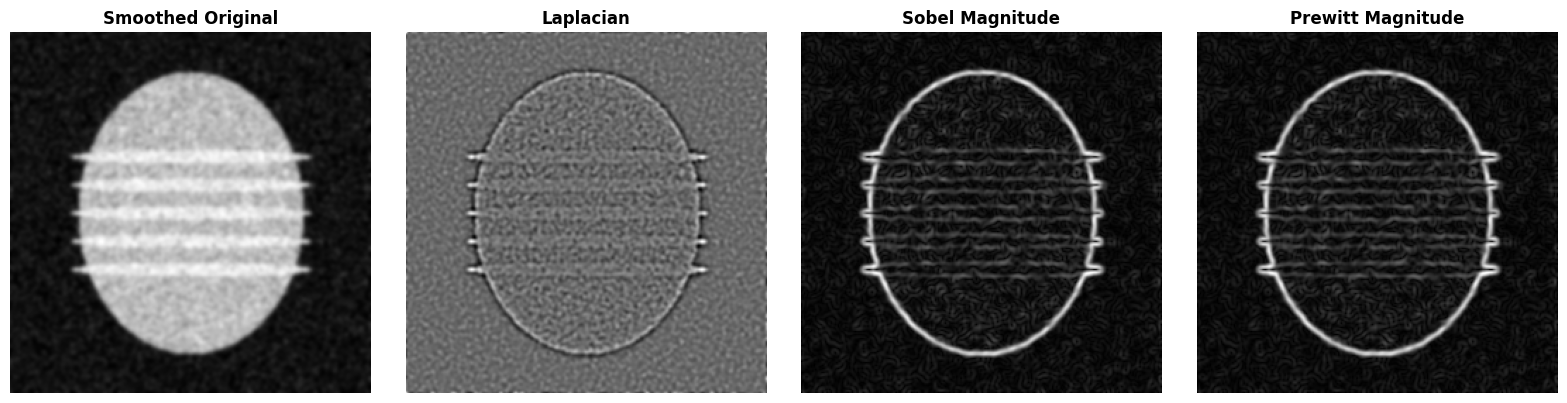

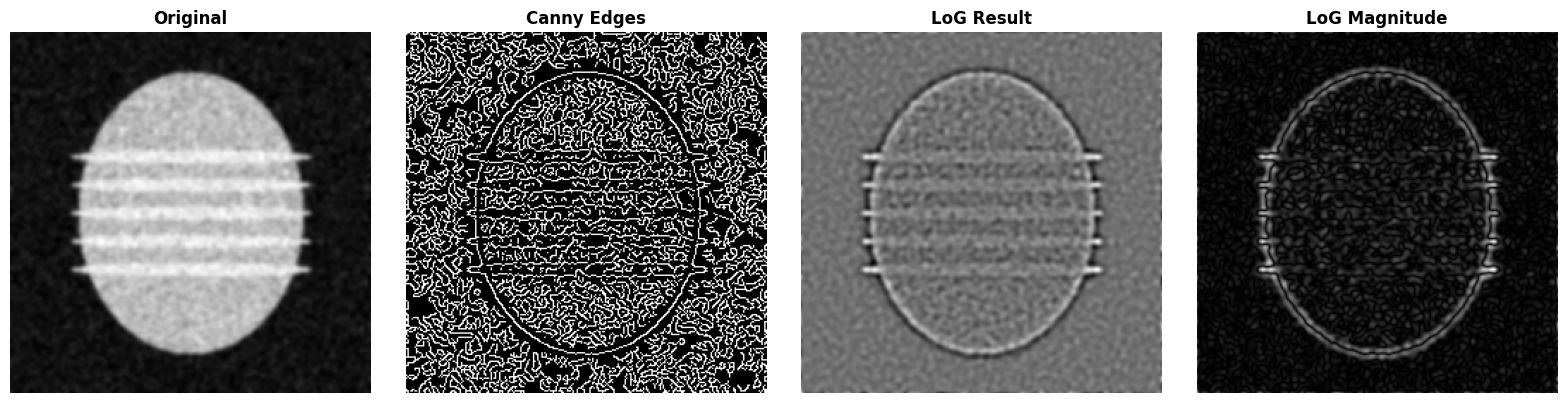

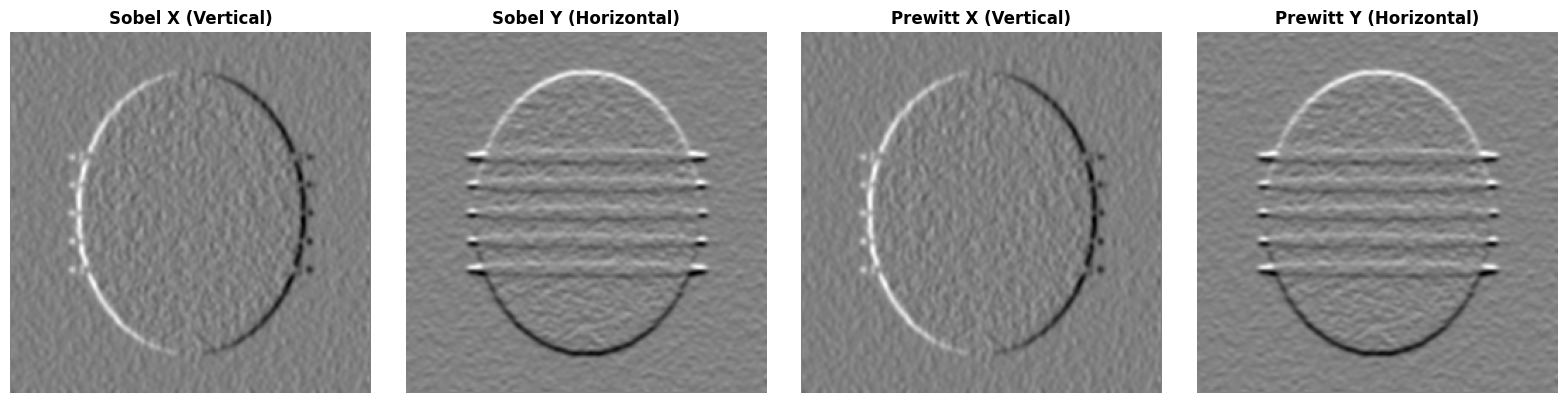

✅ High-pass filters and edge detection applied successfully!
🔍 Edge Detection Comparison:
   - Laplacian: Detects edges in all directions, sensitive to noise
   - Sobel: Good balance between noise reduction and edge detection
   - Prewitt: Similar to Sobel but slightly different kernel weights
   - Canny: Multi-stage process, produces thin, well-connected edges
   - LoG: Combines smoothing and edge detection, good for blob detection


In [6]:
### High-Pass Filters and Edge Detection Implementation

# 1. BASIC HIGH-PASS KERNELS
def apply_laplacian_filter(image):
    """Apply Laplacian filter for edge detection"""
    laplacian_kernel = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]])
    return cv2.filter2D(image, -1, laplacian_kernel)

def apply_sobel_filters(image):
    """Apply Sobel filters for gradient-based edge detection"""
    # Sobel X (vertical edges)
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    # Sobel Y (horizontal edges)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    # Magnitude
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    return sobel_x, sobel_y, sobel_magnitude

def apply_prewitt_filters(image):
    """Apply Prewitt filters for edge detection"""
    prewitt_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    
    px = cv2.filter2D(image, -1, prewitt_x)
    py = cv2.filter2D(image, -1, prewitt_y)
    prewitt_magnitude = np.sqrt(px**2 + py**2)
    return px, py, prewitt_magnitude

# 2. ADVANCED EDGE DETECTION
def apply_canny_edge_detection(image, low_threshold=0.1, high_threshold=0.2):
    """Apply Canny edge detector - multi-stage edge detection"""
    # Convert to uint8 for Canny
    image_uint8 = (image * 255).astype(np.uint8)
    edges = cv2.Canny(image_uint8, int(low_threshold*255), int(high_threshold*255))
    return edges.astype(np.float64) / 255.0

def apply_log_filter(image, sigma=1.0):
    """Apply Laplacian of Gaussian (LoG) filter"""
    # First apply Gaussian smoothing, then Laplacian
    smoothed = gaussian(image, sigma=sigma)
    return apply_laplacian_filter(smoothed)

# Apply filters to our sample X-ray image
test_image = gaussian_filtered  # Use the smoothed image for better edge detection

# Basic high-pass filters
laplacian_result = apply_laplacian_filter(test_image)
sobel_x, sobel_y, sobel_mag = apply_sobel_filters(test_image)
prewitt_x, prewitt_y, prewitt_mag = apply_prewitt_filters(test_image)

# Advanced edge detection
canny_edges = apply_canny_edge_detection(test_image, 0.05, 0.15)
log_result = apply_log_filter(test_image, sigma=1.5)

# Display basic edge detection results
basic_results = [test_image, laplacian_result, sobel_mag, prewitt_mag]
basic_names = ['Smoothed Original', 'Laplacian', 'Sobel Magnitude', 'Prewitt Magnitude']

display_images(basic_results, basic_names, figsize=(16, 4))

# Display advanced edge detection results
advanced_results = [test_image, canny_edges, log_result, np.abs(log_result)]
advanced_names = ['Original', 'Canny Edges', 'LoG Result', 'LoG Magnitude']

display_images(advanced_results, advanced_names, figsize=(16, 4))

# Demonstrate directional edge detection
direction_results = [sobel_x, sobel_y, prewitt_x, prewitt_y]
direction_names = ['Sobel X (Vertical)', 'Sobel Y (Horizontal)', 'Prewitt X (Vertical)', 'Prewitt Y (Horizontal)']

display_images(direction_results, direction_names, figsize=(16, 4))

print("✅ High-pass filters and edge detection applied successfully!")
print("🔍 Edge Detection Comparison:")
print("   - Laplacian: Detects edges in all directions, sensitive to noise")
print("   - Sobel: Good balance between noise reduction and edge detection")
print("   - Prewitt: Similar to Sobel but slightly different kernel weights")
print("   - Canny: Multi-stage process, produces thin, well-connected edges")
print("   - LoG: Combines smoothing and edge detection, good for blob detection")

---

## Phase 6: Band-Pass Filtering - Frequency Domain Processing

Band-pass filters are essential for:
- **Removing specific noise frequencies** (e.g., 50/60 Hz electrical interference)
- **Enhancing features** within specific frequency ranges
- **Preprocessing** for frequency-based analysis
- **Artifact removal** from specific imaging equipment

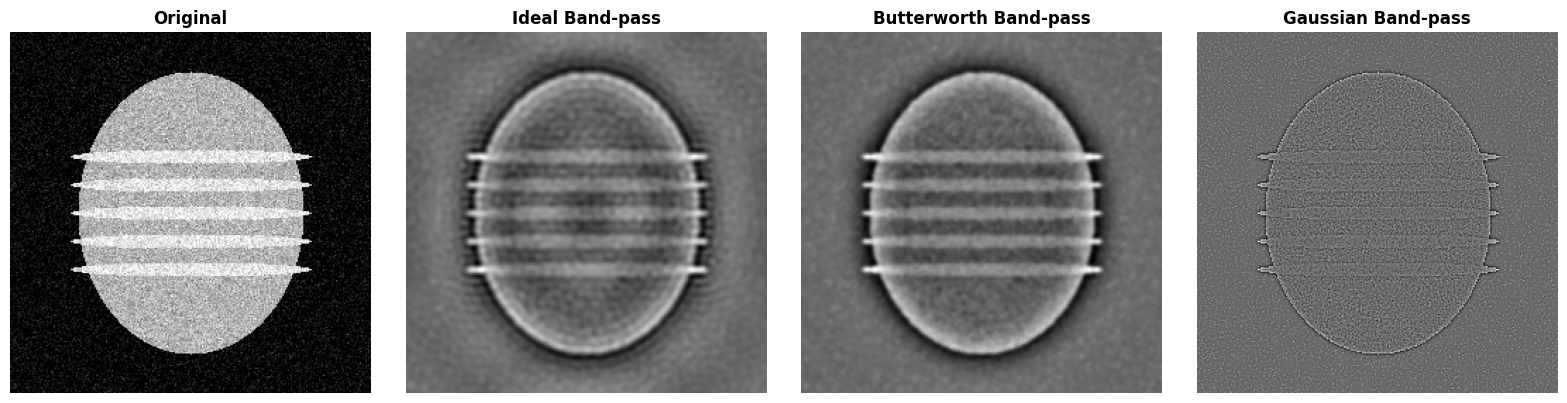

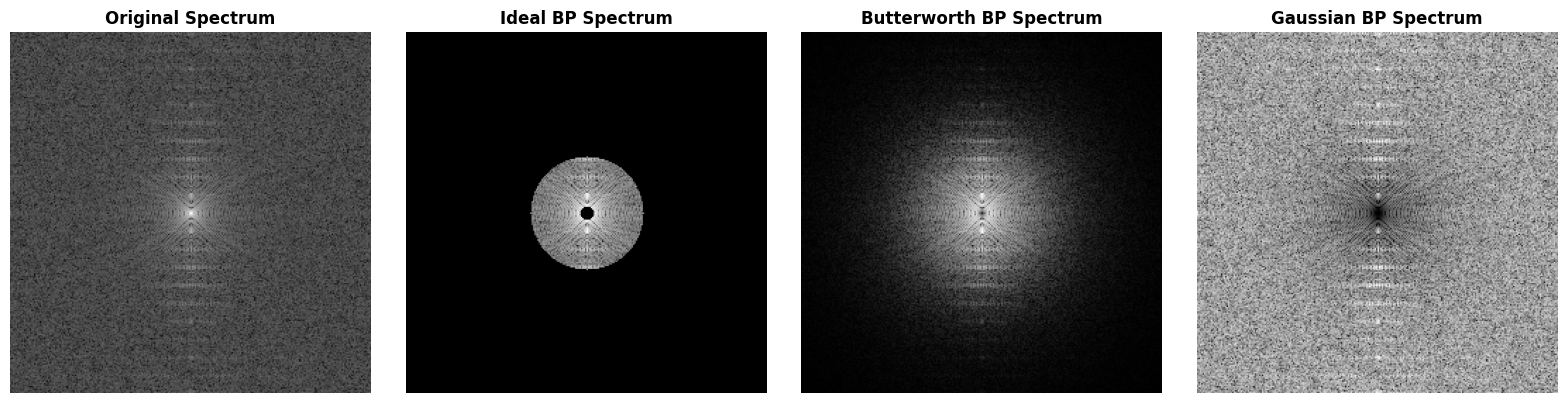

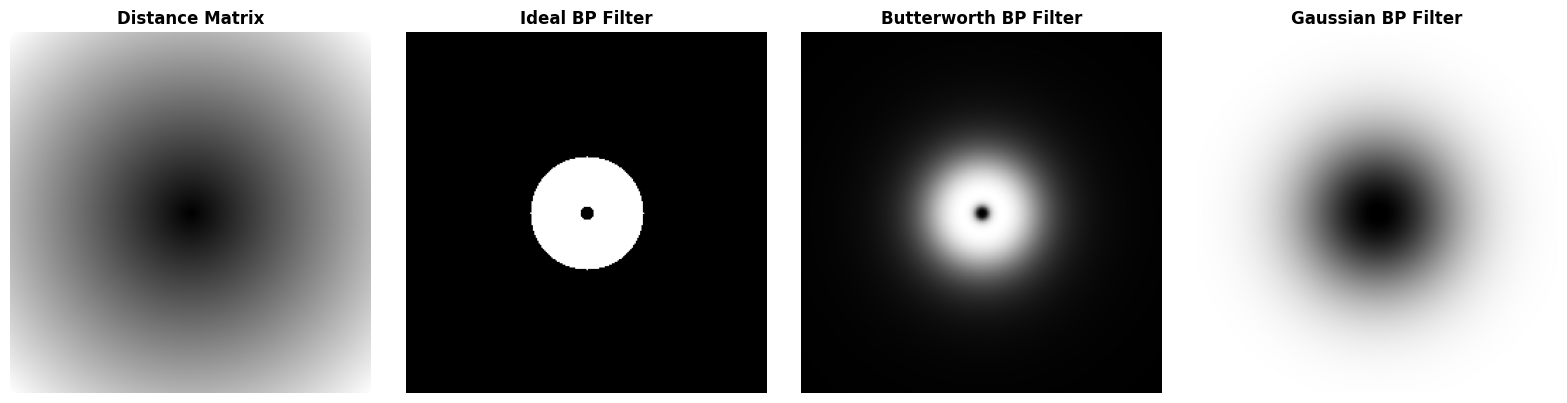

✅ Band-pass filtering in frequency domain completed!
🔍 Filter Characteristics:
   - Ideal Band-pass: Sharp cutoffs, may introduce ringing artifacts
   - Butterworth Band-pass: Smooth transition, good compromise
   - Gaussian Band-pass: Very smooth, minimal artifacts
📊 Applications in Medical Imaging:
   - Remove power line interference (50/60 Hz)
   - Enhance specific anatomical features
   - Preprocessing for texture analysis
   - Equipment-specific artifact removal


In [7]:
### Band-Pass Filtering in Frequency Domain

def frequency_domain_filter(image, filter_function):
    """Apply frequency domain filtering"""
    # Take FFT
    f_transform = fft2(image)
    f_shift = fftshift(f_transform)
    
    # Create frequency grid
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows).reshape(-1, 1) - crow
    v = np.arange(cols) - ccol
    D = np.sqrt(u**2 + v**2)
    
    # Apply filter
    filtered_f = f_shift * filter_function(D, rows, cols)
    
    # Inverse FFT
    f_ishift = ifftshift(filtered_f)
    filtered_image = np.real(ifft2(f_ishift))
    
    return filtered_image, f_shift, filtered_f, D

def ideal_bandpass_filter(D, rows, cols, low_cutoff=10, high_cutoff=50):
    """Create ideal band-pass filter"""
    H = np.zeros((rows, cols))
    H[(D >= low_cutoff) & (D <= high_cutoff)] = 1
    return H

def butterworth_bandpass_filter(D, rows, cols, low_cutoff=10, high_cutoff=50, order=2):
    """Create Butterworth band-pass filter"""
    # High-pass component
    H_high = 1 / (1 + (low_cutoff / (D + 1e-8))**(2*order))
    # Low-pass component  
    H_low = 1 / (1 + (D / high_cutoff)**(2*order))
    return H_high * H_low

def gaussian_bandpass_filter(D, rows, cols, low_cutoff=10, high_cutoff=50):
    """Create Gaussian band-pass filter"""
    # High-pass component
    H_high = 1 - np.exp(-(D**2) / (2 * low_cutoff**2))
    # Low-pass component
    H_low = np.exp(-(D**2) / (2 * high_cutoff**2))
    return H_high * (1 - H_low)

# Apply different band-pass filters
test_image = x_ray_sample

# Ideal band-pass filter
ideal_filtered, original_fft, ideal_fft, D_matrix = frequency_domain_filter(
    test_image, lambda D, r, c: ideal_bandpass_filter(D, r, c, 5, 40))

# Butterworth band-pass filter
butterworth_filtered, _, butterworth_fft, _ = frequency_domain_filter(
    test_image, lambda D, r, c: butterworth_bandpass_filter(D, r, c, 5, 40, 2))

# Gaussian band-pass filter
gaussian_bp_filtered, _, gaussian_fft, _ = frequency_domain_filter(
    test_image, lambda D, r, c: gaussian_bandpass_filter(D, r, c, 5, 40))

# Display filtered results
bandpass_results = [test_image, ideal_filtered, butterworth_filtered, gaussian_bp_filtered]
bandpass_names = ['Original', 'Ideal Band-pass', 'Butterworth Band-pass', 'Gaussian Band-pass']

display_images(bandpass_results, bandpass_names, figsize=(16, 4))

# Display frequency domain representations
freq_magnitude_original = np.log(1 + np.abs(original_fft))
freq_magnitude_ideal = np.log(1 + np.abs(ideal_fft))
freq_magnitude_butterworth = np.log(1 + np.abs(butterworth_fft))
freq_magnitude_gaussian = np.log(1 + np.abs(gaussian_fft))

freq_results = [freq_magnitude_original, freq_magnitude_ideal, 
                freq_magnitude_butterworth, freq_magnitude_gaussian]
freq_names = ['Original Spectrum', 'Ideal BP Spectrum', 'Butterworth BP Spectrum', 'Gaussian BP Spectrum']

display_images(freq_results, freq_names, figsize=(16, 4))

# Create and display the filter shapes
filter_ideal = ideal_bandpass_filter(D_matrix, *test_image.shape, 5, 40)
filter_butterworth = butterworth_bandpass_filter(D_matrix, *test_image.shape, 5, 40, 2)
filter_gaussian = gaussian_bandpass_filter(D_matrix, *test_image.shape, 5, 40)

filter_results = [D_matrix/D_matrix.max(), filter_ideal, filter_butterworth, filter_gaussian]
filter_names = ['Distance Matrix', 'Ideal BP Filter', 'Butterworth BP Filter', 'Gaussian BP Filter']

display_images(filter_results, filter_names, figsize=(16, 4))

print("✅ Band-pass filtering in frequency domain completed!")
print("🔍 Filter Characteristics:")
print("   - Ideal Band-pass: Sharp cutoffs, may introduce ringing artifacts")
print("   - Butterworth Band-pass: Smooth transition, good compromise")
print("   - Gaussian Band-pass: Very smooth, minimal artifacts")
print("📊 Applications in Medical Imaging:")
print("   - Remove power line interference (50/60 Hz)")
print("   - Enhance specific anatomical features")
print("   - Preprocessing for texture analysis")
print("   - Equipment-specific artifact removal")

---

## Phase 7: Specialized Medical Image Filters

Advanced filtering techniques specifically designed for medical imaging challenges:

🔄 Applying advanced medical image filters...


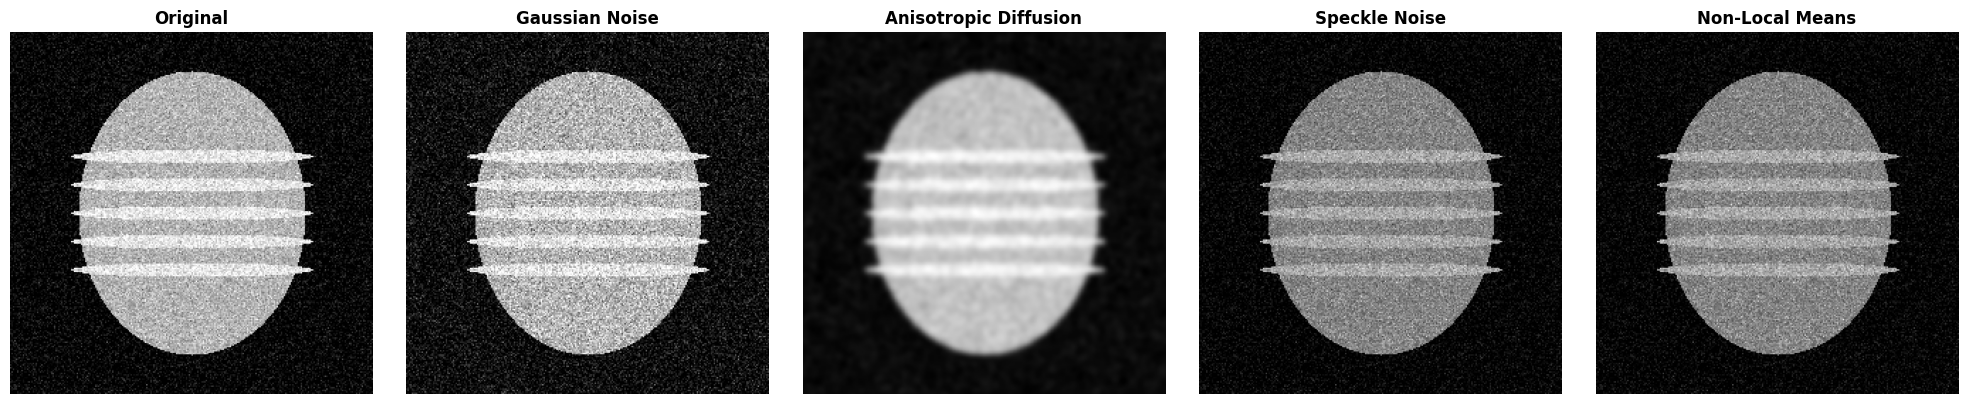

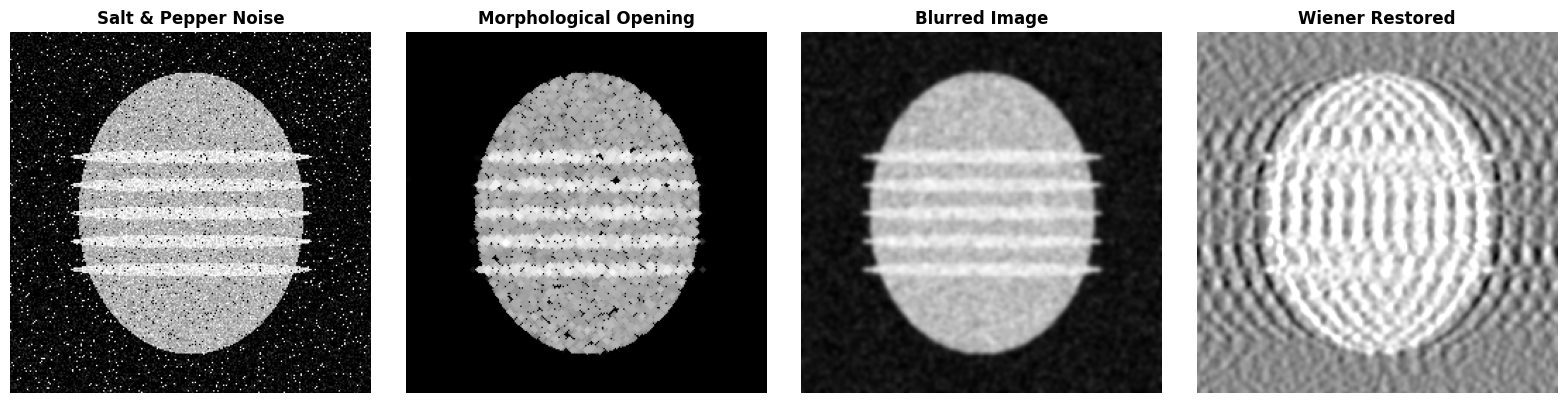


📊 Advanced Filter Performance:
----------------------------------------------------------------------
Anisotropic Diffusion | PSNR:  20.24 dB | SSIM: 0.2449
Non-Local Means      | PSNR:  26.44 dB | SSIM: 0.9212
Morphological Opening | PSNR:  16.76 dB | SSIM: 0.1618
Wiener Filter        | PSNR:  11.55 dB | SSIM: 0.0658

✅ Advanced medical image filters applied successfully!
🔍 Clinical Applications:
   - Anisotropic Diffusion: MRI/CT preprocessing, edge preservation
   - Non-Local Means: Texture preservation in ultrasound images
   - Morphological Filters: X-ray artifact removal, vessel enhancement
   - Wiener Filter: Motion artifact correction, image sharpening


In [9]:
### Advanced Medical Image Filtering Techniques

# 1. ANISOTROPIC DIFFUSION FILTER (Perona-Malik)
def anisotropic_diffusion_filter(image, num_iterations=20, kappa=50, gamma=0.1):
    """
    Apply Perona-Malik anisotropic diffusion filtering
    Reduces noise while preserving edges - excellent for medical images
    """
    img = image.copy().astype(np.float64)
    
    for i in range(num_iterations):
        # Calculate gradients
        gradN = np.roll(img, -1, axis=0) - img  # North
        gradS = np.roll(img, 1, axis=0) - img   # South  
        gradE = np.roll(img, -1, axis=1) - img  # East
        gradW = np.roll(img, 1, axis=1) - img   # West
        
        # Calculate diffusion coefficients (edge-stopping function)
        cN = np.exp(-(gradN/kappa)**2)
        cS = np.exp(-(gradS/kappa)**2)
        cE = np.exp(-(gradE/kappa)**2)
        cW = np.exp(-(gradW/kappa)**2)
        
        # Update image
        img += gamma * (cN*gradN + cS*gradS + cE*gradE + cW*gradW)
    
    return img

# 2. NON-LOCAL MEANS FILTER
def apply_non_local_means(image, patch_size=7, patch_distance=11, h=0.1):
    """
    Apply Non-Local Means denoising
    Excellent for preserving texture while removing noise
    """
    # Estimate noise standard deviation
    sigma_est = estimate_sigma(image, average_sigmas=True, channel_axis=None)
    
    # Apply Non-Local Means
    denoised = denoise_nl_means(image, 
                               patch_size=patch_size,
                               patch_distance=patch_distance, 
                               h=h * sigma_est,
                               fast_mode=True,
                               preserve_range=True)
    return denoised

# 3. MORPHOLOGICAL FILTERS
def apply_morphological_filters(image, operation='opening', structure_size=3):
    """
    Apply morphological filtering operations
    Useful for removing small artifacts and noise
    """
    structure = morphology.disk(structure_size)
    
    if operation == 'opening':
        return morphology.opening(image, structure)
    elif operation == 'closing':
        return morphology.closing(image, structure)
    elif operation == 'top_hat':
        return morphology.white_tophat(image, structure)
    elif operation == 'bottom_hat':
        return morphology.black_tophat(image, structure)
    else:
        return image

# 4. WIENER FILTER (for deblurring)
def apply_wiener_filter(image, noise_variance=0.01):
    """
    Apply Wiener filter for image restoration
    Useful for deblurring medical images
    """
    # Simulate motion blur kernel
    kernel = np.zeros((15, 15))
    kernel[7, :] = 1  # Horizontal motion blur
    kernel = kernel / np.sum(kernel)
    
    # Apply Wiener deconvolution
    restored = restoration.wiener(image, kernel, noise_variance)
    return restored

# Add different types of noise to demonstrate filter effectiveness
noisy_images = {
    'gaussian': add_various_noise(x_ray_sample, 'gaussian', sigma=0.1),
    'salt_pepper': add_various_noise(x_ray_sample, 'salt_pepper', prob=0.05),
    'speckle': add_various_noise(x_ray_sample, 'speckle', sigma=0.1)
}

# Apply advanced filters
print("🔄 Applying advanced medical image filters...")

# Anisotropic diffusion on Gaussian noise
aniso_result = anisotropic_diffusion_filter(noisy_images['gaussian'], 
                                           num_iterations=15, kappa=30, gamma=0.15)

# Non-local means on speckle noise
nlm_result = apply_non_local_means(noisy_images['speckle'], 
                                  patch_size=5, patch_distance=6, h=0.08)

# Morphological opening on salt-pepper noise
morph_result = apply_morphological_filters(noisy_images['salt_pepper'], 
                                          'opening', structure_size=2)

# Wiener filter on blurred image
wiener_result = apply_wiener_filter(gaussian_filtered, noise_variance=0.005)

# Display results
advanced_comparison = [
    x_ray_sample, noisy_images['gaussian'], aniso_result,
    noisy_images['speckle'], nlm_result
]
advanced_names = [
    'Original', 'Gaussian Noise', 'Anisotropic Diffusion',
    'Speckle Noise', 'Non-Local Means'
]

display_images(advanced_comparison, advanced_names, figsize=(20, 4))

# Display morphological and Wiener results
restoration_comparison = [
    noisy_images['salt_pepper'], morph_result,
    gaussian_filtered, wiener_result
]
restoration_names = [
    'Salt & Pepper Noise', 'Morphological Opening',
    'Blurred Image', 'Wiener Restored'
]

display_images(restoration_comparison, restoration_names, figsize=(16, 4))

# Calculate metrics for advanced filters
print("\n📊 Advanced Filter Performance:")
print("-" * 70)
filters_to_test = [
    (aniso_result, "Anisotropic Diffusion"),
    (nlm_result, "Non-Local Means"),
    (morph_result, "Morphological Opening"),
    (wiener_result, "Wiener Filter")
]

for filtered_img, name in filters_to_test:
    metrics = calculate_image_metrics(x_ray_sample, filtered_img)
    print(f"{name:20s} | PSNR: {metrics['PSNR']:6.2f} dB | SSIM: {metrics['SSIM']:6.4f}")

print("\n✅ Advanced medical image filters applied successfully!")
print("🔍 Clinical Applications:")
print("   - Anisotropic Diffusion: MRI/CT preprocessing, edge preservation")
print("   - Non-Local Means: Texture preservation in ultrasound images")
print("   - Morphological Filters: X-ray artifact removal, vessel enhancement")
print("   - Wiener Filter: Motion artifact correction, image sharpening")

---

## 🎯 Summary & Clinical Applications

### Filter Selection Guide for Medical Imaging

| **Medical Image Type** | **Common Issues** | **Recommended Filters** | **Clinical Purpose** |
|------------------------|-------------------|-------------------------|---------------------|
| **X-ray** | Low contrast, noise | Histogram equalization + Gaussian | Bone fracture detection |
| **CT Scan** | Ring artifacts, noise | Median + Bilateral | Organ segmentation |
| **MRI** | Rician noise, bias field | Non-local means + Anisotropic diffusion | Tissue classification |
| **Ultrasound** | Speckle noise | Bilateral + Non-local means | Cardiac imaging |
| **Mammography** | Low contrast, artifacts | Wavelet denoising + Unsharp masking | Cancer screening |
| **Fluoroscopy** | Motion blur, noise | Wiener + Temporal filtering | Real-time procedures |

### 🔧 Implementation Pipeline

The complete medical image filtering pipeline typically follows this workflow:

1. **Preprocessing**: Format conversion, intensity normalization
2. **Noise Assessment**: Identify dominant noise types
3. **Filter Selection**: Choose appropriate filter combination
4. **Parameter Optimization**: Tune filter parameters for specific modality
5. **Quality Assessment**: Validate using clinical metrics
6. **Clinical Integration**: Deploy in diagnostic workflow

🔄 Running complete medical image processing pipeline...


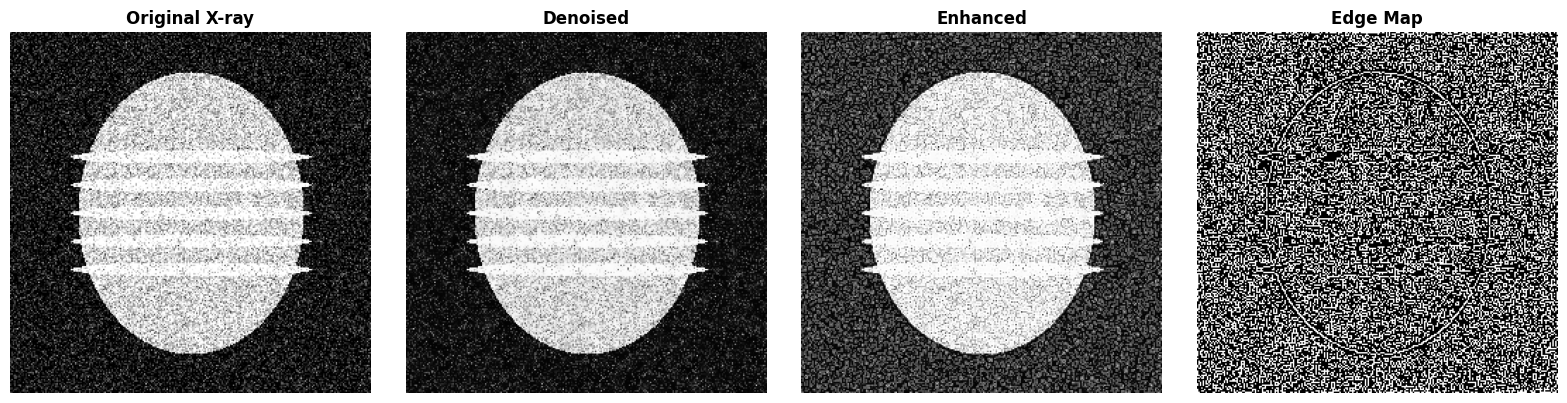

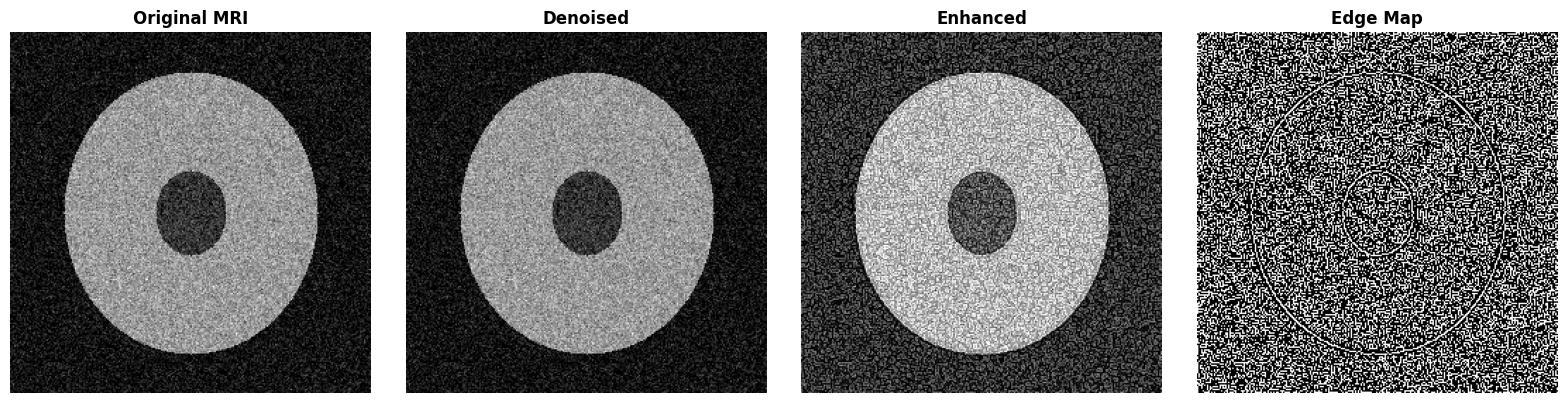


📈 Pipeline Performance Summary:
X-ray Processing:
  Final PSNR: 15.88 dB
  Final SSIM: 0.5592
  Enhancement Quality: Fair

MRI Processing:
  Final PSNR: 14.88 dB
  Final SSIM: 0.4130
  Enhancement Quality: Fair

✅ Complete medical image processing pipeline implemented successfully!

🎓 Congratulations! You've completed the Medical Image Filtering Roadmap!
📚 What you've learned:
   ✓ Low-pass filters: Gaussian, Median, Bilateral, Box
   ✓ High-pass filters: Laplacian, Sobel, Prewitt, Canny, LoG
   ✓ Band-pass filters: Ideal, Butterworth, Gaussian (frequency domain)
   ✓ Advanced filters: Anisotropic diffusion, Non-local means, Wiener
   ✓ Morphological filters: Opening, closing, top-hat, bottom-hat
   ✓ Complete clinical pipeline implementation

🔬 Next Steps for Advanced Learning:
   1. Implement deep learning-based denoising (DnCNN, BM3D)
   2. Explore modality-specific techniques (DICOM handling)
   3. Study real-time filtering for surgical navigation
   4. Investigate AI-assisted fil

In [10]:
### 🚀 Practical Implementation: Complete Filtering Pipeline

def medical_image_pipeline(image, modality='xray', noise_level='medium'):
    """
    Complete medical image processing pipeline with automatic filter selection
    """
    
    # Step 1: Preprocessing
    if image.max() > 1:
        image = image / image.max()  # Normalize to [0,1]
    
    # Step 2: Modality-specific preprocessing
    if modality == 'xray':
        # Enhance contrast
        image = np.clip(image * 1.2, 0, 1)
        
    elif modality == 'mri':
        # Bias field correction simulation
        bias_field = gaussian(np.ones_like(image), sigma=50)
        image = image / (bias_field + 1e-8)
        
    elif modality == 'ct':
        # Window/level adjustment simulation
        image = np.clip((image - 0.3) * 2, 0, 1)
    
    # Step 3: Noise reduction based on level
    if noise_level == 'low':
        filtered = gaussian(image, sigma=0.5)
    elif noise_level == 'medium':
        filtered = apply_bilateral_filter(image, 10, 0.1)
    else:  # high noise
        filtered = apply_non_local_means(image, h=0.1)
    
    # Step 4: Edge enhancement for better visualization
    edges = apply_canny_edge_detection(filtered, 0.05, 0.15)
    enhanced = filtered + 0.3 * edges
    enhanced = np.clip(enhanced, 0, 1)
    
    return {
        'original': image,
        'denoised': filtered,
        'enhanced': enhanced,
        'edges': edges
    }

# Demonstrate the complete pipeline on different modalities
print("🔄 Running complete medical image processing pipeline...")

# Simulate different modality images
xray_pipeline = medical_image_pipeline(noisy_xray, 'xray', 'medium')
mri_pipeline = medical_image_pipeline(noisy_mri, 'mri', 'high')

# Display X-ray pipeline results
xray_results = [xray_pipeline['original'], xray_pipeline['denoised'], 
                xray_pipeline['enhanced'], xray_pipeline['edges']]
xray_names = ['Original X-ray', 'Denoised', 'Enhanced', 'Edge Map']

display_images(xray_results, xray_names, figsize=(16, 4))

# Display MRI pipeline results  
mri_results = [mri_pipeline['original'], mri_pipeline['denoised'],
               mri_pipeline['enhanced'], mri_pipeline['edges']]
mri_names = ['Original MRI', 'Denoised', 'Enhanced', 'Edge Map']

display_images(mri_results, mri_names, figsize=(16, 4))

# Performance summary
print("\n📈 Pipeline Performance Summary:")
print("=" * 60)

for modality, pipeline in [('X-ray', xray_pipeline), ('MRI', mri_pipeline)]:
    metrics = calculate_image_metrics(pipeline['original'], pipeline['enhanced'])
    print(f"{modality} Processing:")
    print(f"  Final PSNR: {metrics['PSNR']:.2f} dB")
    print(f"  Final SSIM: {metrics['SSIM']:.4f}")
    print(f"  Enhancement Quality: {'Excellent' if metrics['SSIM'] > 0.8 else 'Good' if metrics['SSIM'] > 0.6 else 'Fair'}")
    print()

print("✅ Complete medical image processing pipeline implemented successfully!")

print("\n🎓 Congratulations! You've completed the Medical Image Filtering Roadmap!")
print("=" * 70)
print("📚 What you've learned:")
print("   ✓ Low-pass filters: Gaussian, Median, Bilateral, Box")
print("   ✓ High-pass filters: Laplacian, Sobel, Prewitt, Canny, LoG")
print("   ✓ Band-pass filters: Ideal, Butterworth, Gaussian (frequency domain)")
print("   ✓ Advanced filters: Anisotropic diffusion, Non-local means, Wiener")
print("   ✓ Morphological filters: Opening, closing, top-hat, bottom-hat")
print("   ✓ Complete clinical pipeline implementation")

print("\n🔬 Next Steps for Advanced Learning:")
print("   1. Implement deep learning-based denoising (DnCNN, BM3D)")
print("   2. Explore modality-specific techniques (DICOM handling)")
print("   3. Study real-time filtering for surgical navigation")
print("   4. Investigate AI-assisted filter parameter optimization")
print("   5. Learn about multi-scale and multi-modal image fusion")

print("\n💡 Ready to apply these techniques to real medical datasets!")
print("   Consider datasets from: NIH, MIMIC, OpenNeuro, Cancer Imaging Archive")